In [1]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
#importing good reads
gr = pd.read_csv('Goodreads.csv') 

#stops warnings showing
pd.options.mode.copy_on_write = True

### Prelimanary Data Exploration

Before cleaning my data I wanted to look at the raw data to see what was useful for my objectives and how I could segment the data for more specific analysis.

It also showed me what I needed to clean before analysis.

In [3]:
#Dimensions of data
gr.shape

(4400, 20)

In [5]:
gr.head(5)

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
0,0,NaN,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2,Douglas Adams,Del Rey,English,Facing annihilation at the hands of the warlik...,250,Paperback,"['Science Fiction', 'Fiction', 'Humor', 'Fanta...","October 12, 1980",4.21,284403.0,8403.0,NaN,76000.0,8.99,https://www.goodreads.com/book/show/8695.The_R...
1,1,9780156001311,The Name of the Rose,NaN,NaN,Umberto Eco,Harvest Books,English,The year is 1327. Benedictines in a wealthy It...,536,Paperback,"['Fiction', 'Historical Fiction', 'Mystery', '...","January 1, 1980",4.14,361775.0,12681.0,16700.0,319000.0,7.99,https://www.goodreads.com/book/show/119073.The...
2,2,NaN,The Clan of the Cave Bear,Earth's Children,1,Jean M. Auel,Bantam,English,This novel of awesome beauty and power is a mo...,516,Kindle Edition,"['Historical Fiction', 'Fiction', 'Fantasy', '...","January 1, 1980",4.09,265242.0,7967.0,NaN,90500.0,9.99,https://www.goodreads.com/book/show/40611463-t...
3,3,NaN,Firestarter,NaN,NaN,Stephen King,Signet,English,The Department of Scientific Intelligence (aka...,564,Mass Market Paperback,"['Horror', 'Fiction', 'Thriller', 'Science Fic...","September 29, 1980",3.91,226953.0,5290.0,NaN,112000.0,9.99,https://www.goodreads.com/book/show/233667.Fir...
4,4,9780375508325,Cosmos,NaN,NaN,Carl Sagan,Random House,English,The story of fifteen billion years of cosmic e...,384,Mass Market Paperback,"['Science', 'Nonfiction', 'Physics', 'Astronom...","January 1, 1980",4.39,145133.0,4400.0,NaN,225000.0,14.99,https://www.goodreads.com/book/show/55030.Cosmos


In [6]:
#looking at dtypes
gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4400 non-null   int64  
 1   isbn                   3818 non-null   object 
 2   title                  4400 non-null   object 
 3   series_title           2227 non-null   object 
 4   series_release_number  2213 non-null   object 
 5   authors                4400 non-null   object 
 6   publisher              4287 non-null   object 
 7   language               4374 non-null   object 
 8   description            4398 non-null   object 
 9   num_pages              4378 non-null   object 
 10  format                 4366 non-null   object 
 11  genres                 4400 non-null   object 
 12  publication_date       4399 non-null   object 
 13  rating_score           4400 non-null   float64
 14  num_ratings            4400 non-null   float64
 15  num_

In [7]:
#looking at null values
gr.isnull().sum()

Unnamed: 0                  0
isbn                      582
title                       0
series_title             2173
series_release_number    2187
authors                     0
publisher                 113
language                   26
description                 2
num_pages                  22
format                     34
genres                      0
publication_date            1
rating_score                0
num_ratings                 0
num_reviews                 0
current_readers          1879
want_to_read             1212
price                     256
url                         0
dtype: int64

In [8]:
#looking at unique values in each series
gr.nunique()

Unnamed: 0               4400
isbn                     3742
title                    4287
series_title             1115
series_release_number     101
authors                  1958
publisher                1050
language                    8
description              4313
num_pages                 751
format                     19
genres                   3731
publication_date         2016
rating_score              154
num_ratings              4249
num_reviews              3340
current_readers          1093
want_to_read             1271
price                     146
url                      4321
dtype: int64

In [9]:
#looking at main statistical analysis of the current int and float data type series
#it looks like current_readers & num_reviews have some outliers
gr.describe()

,Unnamed: 0,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price
count,4400.000000,4400.000000,4.400000e+03,4400.000000,2521.000000,3.188000e+03,4144.000000
mean,2199.500000,4.021114,1.434473e+05,8567.734545,6461.339151,1.166822e+05,8.890442
std,1270.314922,0.241529,3.945294e+05,18283.750763,16172.314195,1.900473e+05,4.485970
min,0.000000,2.970000,4.000000e+00,0.000000,2.000000,7.000000e+00,0.000000
25%,1099.750000,3.870000,1.288700e+04,688.500000,188.000000,1.820000e+04,6.990000
50%,2199.500000,4.030000,4.196350e+04,2429.000000,486.000000,4.455000e+04,9.990000
75%,3299.250000,4.180000,1.198162e+05,8016.250000,927.000000,1.310000e+05,11.990000
max,4399.000000,4.810000,9.904188e+06,258531.000000,224000.000000,2.000000e+06,33.990000


In [10]:
#looking at the top 10 num_reviews
#isbn isn't included on these books so it is probably not a useful data
gr.sort_values(by='num_reviews', ascending=False).head(10)

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
3706,3706,9781501139239,The Seven Husbands of Evelyn Hugo,NaN,NaN,Taylor Jenkins Reid,Atria Books,English,Aging and reclusive Hollywood movie icon Evely...,389,Hardcover,"['Fiction', 'Romance', 'Historical Fiction', '...","June 13, 2017",4.43,2853896.0,258531.0,133000.0,2000000.0,14.99,https://www.goodreads.com/book/show/32620332-t...
3608,3608,NaN,It Ends with Us,It Ends with Us,1,Colleen Hoover,Atria Books,English,Sometimes it is the one who loves you who hurt...,386,Kindle Edition,"['Romance', 'Fiction', 'Contemporary', 'New Ad...","August 2, 2016",4.18,3201607.0,241411.0,104000.0,1000000.0,11.99,https://www.goodreads.com/book/show/27362503-i...
2800,2800,9780439023481,The Hunger Games,The Hunger Games,1,Suzanne Collins,Scholastic Press,English,"Could you survive on your own in the wild, wit...",374,Hardcover,"['Young Adult', 'Fiction', 'Fantasy', 'Dystopi...","September 14, 2008",4.33,8542473.0,215236.0,90000.0,2000000.0,0.00,https://www.goodreads.com/book/show/2767052-th...
3803,3803,9780735219113,Where the Crawdads Sing,NaN,NaN,Delia Owens,G.P. Putnam’s Sons,English,"For years, rumors of the “Marsh Girl” haunted ...",384,ebook,"['Fiction', 'Historical Fiction', 'Mystery', '...","August 14, 2018",4.39,2912277.0,200192.0,172000.0,48800.0,12.99,https://www.goodreads.com/book/show/36809135-w...
3901,3901,9781250301697,The Silent Patient,NaN,NaN,Alex Michaelides,Celadon Books,English,Alicia Berenson’s life is seemingly perfect. A...,336,Hardcover,"['Thriller', 'Mystery', 'Fiction', 'Mystery Th...","January 1, 2018",4.18,2036201.0,178450.0,127000.0,119000.0,0.00,https://www.goodreads.com/book/show/40097951-t...
3200,3200,NaN,The Fault in Our Stars,NaN,NaN,John Green,Dutton Books,English,Despite the tumor-shrinking medical miracle th...,313,Hardcover,"['Young Adult', 'Fiction', 'Contemporary', 'Re...","January 10, 2012",4.14,5071582.0,177627.0,66200.0,2000000.0,9.99,https://www.goodreads.com/book/show/11870085-t...
4004,4004,NaN,The Midnight Library,NaN,NaN,Matt Haig,Viking,English,"Between life and death there is a library, and...",304,Hardcover,"['Fiction', 'Fantasy', 'Contemporary', 'Audiob...","August 13, 2020",4.00,1687938.0,175971.0,99100.0,1000000.0,13.99,https://www.goodreads.com/book/show/52578297-t...
3501,3501,9781619634442,A Court of Thorns and Roses,A Court of Thorns and Roses,1,Sarah J. Maas,Bloomsbury USA Childrens,English,Feyre's survival rests upon her ability to hun...,432,Hardcover,"['Fantasy', 'Romance', 'Young Adult', 'Fiction...","May 5, 2015",4.20,2244793.0,175858.0,132000.0,57500.0,8.21,https://www.goodreads.com/book/show/16096824-a...
4300,4300,9781649374042,Fourth Wing,The Empyrean,1,Rebecca Yarros,Entangled: Red Tower Books,English,Enter the brutal and elite world of a war coll...,498,Hardcover,"['Fantasy', 'Romance', 'Dragons', 'Fiction', '...","May 2, 2023",4.61,1227650.0,173578.0,102000.0,1000000.0,14.99,https://www.goodreads.com/book/show/61431922-f...
3900,3900,9781524798628,Daisy Jones & The Six,NaN,NaN,Taylor Jenkins Reid,Ballantine Books,English,Daisy is a girl coming of age in L.A. in the l...,355,Hardcover,"['Fiction', 'Historical Fiction', 'Audiobook',...","March 5, 2019",4.21,1434254.0,171301.0,66400.0,1000000.0,12.99,https://www.goodreads.com/book/show/40597810-d...


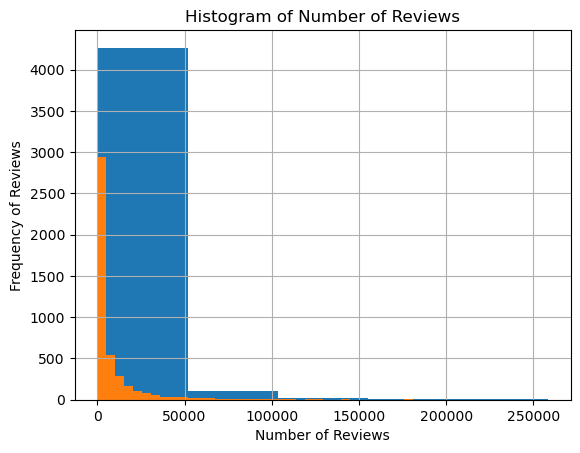

In [11]:
#most entries have less than 50000 reviews
gr.num_reviews.hist(bins=5)
# overlaying a histogram with more bins to look at the distribution of the lower number
gr.num_reviews.hist(bins=50)

plt.xlabel('Number of Reviews')
plt.ylabel('Frequency of Reviews')
plt.title('Histogram of Number of Reviews')
plt.grid(True)
plt.show()

#### Looking at correlation between quantatative series

In [12]:
corrrelation = gr[['rating_score','num_ratings','num_reviews','current_readers','want_to_read','price']].corr()
corrrelation

,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price
rating_score,1.000000,0.122814,0.136116,0.220419,0.144118,-0.071446
num_ratings,0.122814,1.000000,0.794985,0.713215,0.709570,0.008550
num_reviews,0.136116,0.794985,1.000000,0.848666,0.837938,0.075176
current_readers,0.220419,0.713215,0.848666,1.000000,0.768705,0.107099
want_to_read,0.144118,0.709570,0.837938,0.768705,1.000000,0.085767
price,-0.071446,0.008550,0.075176,0.107099,0.085767,1.000000


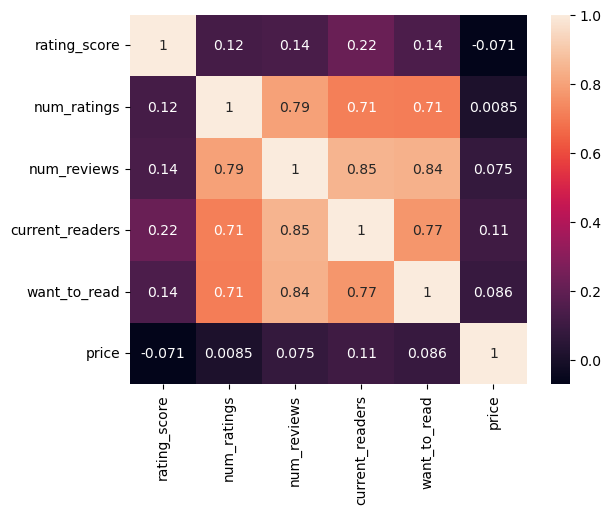

In [13]:
#heat map of correlation 
#highest correlation - num of reviews and current readers, num_reviews
#low correlation anything to do with price
#
sns.heatmap(corrrelation, annot=True)
plt.show()

Text(0, 0.5, 'Number of Ratings per book')

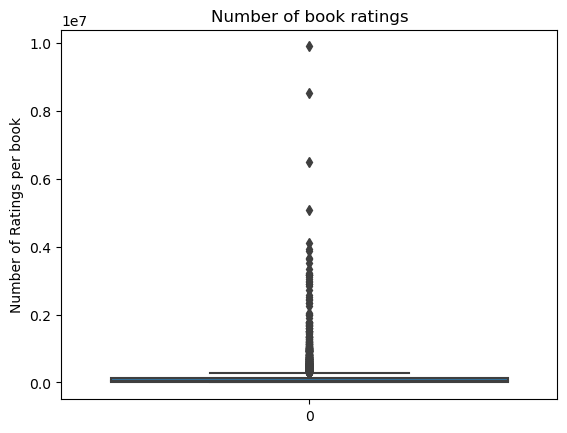

In [14]:
#looking at the outliers
#num_ratings has lots of outliers these are all things I cannot change about a book so I need to see how the qualitys of the book
#interacts with these measurable outcomes, we also need to see if there are any mistakes
sns.boxplot(data=gr['num_ratings'])
plt.title('Number of book ratings')
plt.xlabel('')
plt.ylabel('Number of Ratings per book')

### Data Cleaning

In [88]:
gr.columns

Index(['Unnamed: 0', 'isbn', 'title', 'series_title', 'series_release_number',
       'authors', 'publisher', 'language', 'description', 'num_pages',
       'format', 'genres', 'publication_date', 'rating_score', 'num_ratings',
       'num_reviews', 'current_readers', 'want_to_read', 'price', 'url'],
      dtype='object')

In [89]:
#dropping columns that are not measurable or useful
gr1 = gr[['isbn', 'title', 'series_title', 'series_release_number',
       'authors', 'publisher', 'language', 'num_pages',
       'format', 'genres', 'publication_date', 'rating_score', 'num_ratings',
       'num_reviews', 'current_readers', 'want_to_read', 'price']]

#### Formatting Strings

In [90]:
#formatting the object columns so the strings are titles
gr1['title'] = gr1['title'].str.title()
gr1['series_title'] = gr1['series_title'].str.title()
gr1['authors'] = gr1['authors'].str.title()
gr1['publisher'] = gr1['publisher'].str.title()
gr1['language'] = gr1['language'].str.title()

In [91]:
#strip whitespace from the front and back of strings
gr1['title'] = gr1['title'].str.strip()
gr1['series_title'] = gr1['series_title'].str.strip()
gr1['authors'] = gr1['authors'].str.strip()
gr1['publisher'] = gr1['publisher'].str.strip()
gr1['language'] = gr1['language'].str.strip()

### dropping duplicates

Dropping rows that match for every column

In [92]:
# checking the data fram for duplicates
gr.duplicated().value_counts()

False    4400
Name: count, dtype: int64

In [93]:
# dropping duplicate rows
gr1 = gr.drop_duplicates()

In [94]:
#checking code
gr1.duplicated().value_counts()

False    4400
Name: count, dtype: int64

Dropping Duplicates based on title and author

In [95]:
#duplicates that have different isbn but the same title and author
gr1[['title', 'authors']].duplicated().value_counts()

False    4308
True       92
Name: count, dtype: int64

In [96]:
#looked at the 5 first duplicates and see that the stats match just different publishers & isbn
# setting a variable to look up duplicated titles in the main dataframe
test_duplicate_title1 = gr1[gr1[['title', 'authors']].duplicated()].reset_index().loc[4,'title']


In [97]:
#looking at this duplicated title I can see that the difference is isbn and publisher, but the stats are similar
gr1[gr1.title==test_duplicate_title1]

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
207,207,9780345350497,The Mists of Avalon,Avalon,1,Marion Zimmer Bradley,Ballantine Books,English,"Here is the magical legend of King Arthur, viv...",884,Paperback,"['Fantasy', 'Fiction', 'Historical Fiction', '...","December 1, 1982",4.13,205872.0,7530.0,NaN,149000.0,13.99,https://www.goodreads.com/book/show/402045.The...
305,305,9780345350497,The Mists of Avalon,Avalon,1,Marion Zimmer Bradley,Ballantine Books,English,"Here is the magical legend of King Arthur, viv...",884,Paperback,"['Fantasy', 'Fiction', 'Historical Fiction', '...","December 1, 1982",4.13,205872.0,7530.0,NaN,149000.0,13.99,https://www.goodreads.com/book/show/402045.The...


In [98]:
#dropping duplicates of books with different authors and isbn
gr1 = gr1.drop_duplicates(subset=['title', 'authors'])

### Exploring & Removing NaN Values

#### Qualatative NaN's

In [99]:
#filling object NaNs with strings
gr1['isbn'].fillna('unknown', inplace=True)
gr1['series_title'].fillna('n/a', inplace=True)
gr1['publisher'].fillna('unknown', inplace=True)

#### Series Release Number

In [100]:
#looking at different kinds of release number
gr1.series_release_number.unique()

array(['2', nan, '1', '3', '4', '7', '5', '6', '9', '8', '11', '1-3',
       '1-2', '32', '1,1', '12', '13', '24', '34', '10', '14', '21',
       '1-4', '2,2', '0', '4,1', '3,1', '6,2', '15', '1,4', '8,1', '17',
       '21,4', '16', '10,1', '11,2', '12,3', '18', '3-4', '45', '14,4',
       '19', '15,2', '0.5', '1,6', '11.5', '16,3', '3,3', '20', '18,5',
       '4,4', '1,5', '19,3', '8,9', '23', '5,6', '47', '23,6', '22,6',
       '2,10', '24,5', '6,8', '22', '0A', '25', '7,10', '28', '26,5',
       '29,6', '8,11', '3,0B', '31,3', '30,1', '9,13', '33', '32,2',
       '10,14', '1,16', '34,7', '11,15', '12,17', '7,3', '13,18', '25.5',
       '18,4,2', '38,4', '2,5', '3,8', '3.5', '5,1', '1.5', '2.5', '7,1',
       '8,2', '3.1', '3,2', '3.6', '4.5', '44', '1,13', '2,10.6',
       '1,10.5'], dtype=object)

In [101]:
#filling nan values with 0
gr1.series_release_number.fillna(0, inplace=True)

In [102]:
#counting how many entries include a - to see if its worth editing or just dropping
gr1.series_release_number.str.contains("-").value_counts()

series_release_number
False    2153
True       22
Name: count, dtype: int64

In [103]:
#checking how many values contain ,
gr1.series_release_number.str.contains(",").value_counts()

series_release_number
False    2109
True       66
Name: count, dtype: int64

In [104]:
#looking at what this format means '4,1'
gr1[gr1.series_release_number=='2,10.6']

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
4359,4359,NaN,Magic Claims,"Kate Daniels: Wilmington Years, Kate Daniels","2,10.6",Ilona Andrews,NYLA,English,Kate and Curran have just settled into their n...,240,Kindle Edition,"['Urban Fantasy', 'Fantasy', 'Paranormal', 'Ma...","June 13, 2023",4.72,10835.0,1189.0,623.0,NaN,5.99,https://www.goodreads.com/book/show/109554429-...


In [105]:
#splitting strings that contain , and taking the first number
gr1['series_release_number'] = gr1['series_release_number'].str.split(",").str[0]

In [106]:
#checking how this has cleaned up the series
gr1.series_release_number.unique()

array(['2', nan, '1', '3', '4', '7', '5', '6', '9', '8', '11', '1-3',
       '1-2', '32', '12', '13', '24', '34', '10', '14', '21', '1-4', '0',
       '15', '17', '16', '18', '3-4', '45', '19', '0.5', '11.5', '20',
       '23', '47', '22', '0A', '25', '28', '26', '29', '31', '30', '33',
       '25.5', '38', '3.5', '1.5', '2.5', '3.1', '3.6', '4.5', '44'],
      dtype=object)

In [107]:
#filtering out multiple books in 1 as they will be huge outliers due to group ratings
gr1[gr1.series_release_number=='1-4']

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
582,582,9780553383157,Viriconium,Viriconium,1-4,M. John Harrison,Spectra,English,This landmark collection gathers four groundbr...,462,Paperback,"['Fantasy', 'Fiction', 'Science Fiction', 'Sho...","July 1, 2000",3.81,2527.0,242.0,323.0,NaN,12.99,https://www.goodreads.com/book/show/304217.Vir...
2037,2037,9780439249546,The Harry Potter Collection 1-4,Harry Potter,1-4,J.K. Rowling,"Scholastic, Inc.",English,"The exciting tales of Harry Potter, the young ...",1500,Hardcover,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...","January 1, 1999",4.69,65206.0,329.0,242.0,NaN,NaN,https://www.goodreads.com/book/show/99298.The_...


In [108]:
#checking that nan values are gone
gr1.series_release_number.isna().value_counts()

series_release_number
False    2175
True     2133
Name: count, dtype: int64

In [109]:
#dropping values with - as they are multiple books
gr1 = gr1[gr1.series_release_number.str.contains('-')==False]

In [110]:
#checking if there are any more values to clean
gr1.series_release_number.unique()

array(['2', '1', '3', '4', '7', '5', '6', '9', '8', '11', '32', '12',
       '13', '24', '34', '10', '14', '21', '0', '15', '17', '16', '18',
       '45', '19', '0.5', '11.5', '20', '23', '47', '22', '0A', '25',
       '28', '26', '29', '31', '30', '33', '25.5', '38', '3.5', '1.5',
       '2.5', '3.1', '3.6', '4.5', '44'], dtype=object)

In [111]:
#filtering to look at value with 0A as value
(gr1[gr1.series_release_number=='0A'])

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
1993,1993,9780446608374,Thunderhead,Nora Kelly,0A,Douglas Preston,Grand Central Publishing,English,"Nora Kelly, a young archaeologist in Santa Fe,...",531,Mass Market Paperback,"['Thriller', 'Fiction', 'Mystery', 'Adventure'...","January 1, 1999",4.12,29943.0,1121.0,993.0,11900.0,7.99,https://www.goodreads.com/book/show/136636.Thu...


In [112]:
#removing 0A and replacing with 0
gr1['series_release_number'] = gr1['series_release_number'].replace({'0A':'0'})

In [113]:
gr1.loc[1993,'series_release_number']

'0'

In [114]:
#converting to a float
gr1.series_release_number = gr1.series_release_number.astype(float)

In [115]:
gr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2153 entries, 0 to 4398
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2153 non-null   int64  
 1   isbn                   1812 non-null   object 
 2   title                  2153 non-null   object 
 3   series_title           2153 non-null   object 
 4   series_release_number  2153 non-null   float64
 5   authors                2153 non-null   object 
 6   publisher              2066 non-null   object 
 7   language               2141 non-null   object 
 8   description            2153 non-null   object 
 9   num_pages              2145 non-null   object 
 10  format                 2135 non-null   object 
 11  genres                 2153 non-null   object 
 12  publication_date       2152 non-null   object 
 13  rating_score           2153 non-null   float64
 14  num_ratings            2153 non-null   float64
 15  num_revie

#### num_pages

In [116]:
#look at what kind of values are num_pages
gr1.num_pages.unique()

array(['250', '516', '566', '214', '192', '306', '210', '262', '304',
       '288', '256', '335', '278', '332', '439', '224', '754', '182',
       '32', '208', '276', '308', '336', '433', '454', '190', '1376',
       '423', '217', '303', '31', '480', '312', '207', '270', '186',
       '526', '326', '432', '345', '218', '248', '374', '448', '180',
       '172', '314', '231', '884', '23', '450', '564', '202', '812',
       '195', '352', '290', '311', '368', '272', '240', '279', '485',
       '323', '203', '472', '310', '400', '64', '228', '438', '325',
       '140', '286', '144', '187', '458', '367', '213', '305', '353',
       '414', '330', '307', '96', '128', '204', '154', '189', '399',
       '293', nan, '291', '118', '292', '167', '770', '268', '264', '444',
       '375', '391', '275', '383', '1087', '669', '301', '384', '246',
       '320', '295', '372', '483', '176', '627', '126', '424', '319',
       '408', '324', '960', '481', '159', '359', '512', '327', '476',
       '179', '704

In [117]:
#stripping the white space from the front and page of the string
gr1.num_pages = gr1.num_pages.str.strip()

In [118]:
#splitting the string into substrings and only keeping the first string
gr1.num_pages = gr1.num_pages.str.split().str[0]

In [119]:
#checking nan values
gr1.num_pages.isna().value_counts()

num_pages
False    2145
True        8
Name: count, dtype: int64

In [120]:
#creating a table of items that are not a nan
numpg_notna = gr1[gr1.num_pages.isna()==False]

In [121]:
#finding the central tendency by coverting to int
print(numpg_notna.num_pages.astype(int).mode().round())
print(numpg_notna.num_pages.astype(int).mean().round())
print(numpg_notna.num_pages.astype(int).median())

mean_num_pages = numpg_notna.num_pages.astype(int).mean().round()

0    320
1    384
Name: num_pages, dtype: int32
391.0
368.0


In [122]:
#changing value to a string
mean_num_pages = mean_num_pages.astype(str)

In [123]:
#filling nan values with mean
gr1.num_pages = gr1.num_pages.fillna(mean_num_pages)

In [124]:
#checking it worked
gr1.num_pages.isna().value_counts()

num_pages
False    2153
Name: count, dtype: int64

In [125]:
#converting dtype to int
gr1.num_pages.replace({'373.0':'373'}, inplace=True)


In [126]:
#converting the series to a float
gr1.num_pages = gr1.num_pages.astype(float)

In [127]:
gr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2153 entries, 0 to 4398
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2153 non-null   int64  
 1   isbn                   1812 non-null   object 
 2   title                  2153 non-null   object 
 3   series_title           2153 non-null   object 
 4   series_release_number  2153 non-null   float64
 5   authors                2153 non-null   object 
 6   publisher              2066 non-null   object 
 7   language               2141 non-null   object 
 8   description            2153 non-null   object 
 9   num_pages              2153 non-null   float64
 10  format                 2135 non-null   object 
 11  genres                 2153 non-null   object 
 12  publication_date       2152 non-null   object 
 13  rating_score           2153 non-null   float64
 14  num_ratings            2153 non-null   float64
 15  num_revie

#### Language

In [128]:
#most common language is english
gr1.language.value_counts()

language
English               2134
French                   3
Spanish; Castilian       2
German                   1
Dutch; Flemish           1
Name: count, dtype: int64

In [129]:
#looking at null values in language
gr1.language.isna().value_counts()

language
False    2141
True       12
Name: count, dtype: int64

In [130]:
#filling nans with English as most common answer
gr1.language.fillna('English', inplace=True)

#### Format

In [131]:
#Many similar fomat types, I want to simplfy
gr1.format.unique()

array(['Paperback', 'Kindle Edition', 'Mass Market Paperback',
       'Hardcover', 'Audio Cassette', 'Broschiert', nan,
       'Unknown Binding', 'ebook', 'Library Binding', 'Trade Paperback',
       'Audio CD', 'Nook'], dtype=object)

In [132]:
#making sure the capatlisation is consistent
gr1.format = gr1.format.str.title()

In [133]:
#counting number of unique
gr1.format.nunique()

12

In [134]:
#rempapping paperback
gr1['format'] = gr1['format'].replace({'Mass Market Paperback':'Paperback',
                                       'Trade Paperback':'Paperback', 
                                       'Paper':'Paperback'})

In [135]:
gr1['format'].nunique()

10

In [136]:
#remapping for ebooks and audio
gr1['format'] = gr1['format'].replace({'Kindle Edition':'Ebook',
                                       'Audio Cd':'Audiobook', 
                                       'Audio Cassette':'Audiobook',
                                      'Slipcased Hardcover':'Hardcover',
                                      'Broschiert':'Paperback',
                                      'Library Binding':'Hardcover',
                                      'Nook':'Ebook',
                                      'Board Book':'Hardcover',
                                      'Print':'Paperback',
                                      'Unknown Binding':'Unknown'})

In [137]:
#counting unique qty
gr1.format.nunique()

5

In [138]:
# filling na as unknown
gr1.format.fillna('Unknown', inplace=True)

#### publication date

In [139]:
#looking at string that can't be converted
gr1.publication_date.iloc[1183]

'August 21, 2007'

In [140]:
#strip published from strings
gr1.publication_date = gr1.publication_date.str.lstrip('Published')

In [141]:
#remove all substrings if Published from series
gr1.publication_date.str.contains('Published').value_counts()

publication_date
False    2152
Name: count, dtype: int64

In [142]:
#converting to a datetime format
gr1.publication_date = pd.to_datetime(gr1.publication_date, format='mixed')

In [143]:
#checking dtypes
gr1.dtypes

Unnamed: 0                        int64
isbn                             object
title                            object
series_title                     object
series_release_number           float64
authors                          object
publisher                        object
language                         object
description                      object
num_pages                       float64
format                           object
genres                           object
publication_date         datetime64[ns]
rating_score                    float64
num_ratings                     float64
num_reviews                     float64
current_readers                 float64
want_to_read                    float64
price                           float64
url                              object
dtype: object

### Creating new columns

In [144]:
#creating a year published catagory based of the published date
gr1['Year_published'] = gr1.publication_date.dt.year

In [145]:
#creating a year published catagory based of the published date
gr1['Month_published'] = gr1.publication_date.dt.month

In [146]:
#filling nans in year and month published with the mean
mean_year = gr1.Year_published.mean()
display(gr1.Year_published.mode())
display(gr1.Year_published.median())

mean_month = gr1.Month_published.mean()

0    2013.0
Name: Year_published, dtype: float64

2005.0

In [147]:
#filling null values with means
gr1.Year_published = gr1.Year_published.fillna(mean_year)
gr1.Month_published = gr1.Month_published.fillna(mean_month)

In [148]:
#checking for more null values
gr1.Year_published.isnull().value_counts()

Year_published
False    2153
Name: count, dtype: int64

### Genres

In [149]:
gr2 = gr1.copy()

In [150]:
gr2.reset_index(inplace=True)

In [151]:
#function to format the genre column
def genreformat(string):
    string = string.replace("]","")
    string = string.replace("[","")
    string = string.replace("'","")
    string = string.upper()
    return string
    

In [152]:
#applying formatting function to genre series
gr2.genres = gr2.genres.apply(genreformat)

In [153]:
#splitting the genres into lists
gr2.genres = gr2.genres.str.split(",")

In [154]:
#creating a data frame where we explode the genres so we can count occurences
genredf = gr2.explode('genres')

In [155]:
#formating the strings in the list
genredf.genres = genredf.genres.str.lstrip(" ")

In [156]:
#counting the unique values
genredf.genres.nunique()

289

In [157]:
#removing audio book as a genre as its a format not a genre
genredf = genredf[genredf.genres!='AUDIOBOOK']

#### Current Readers

In [ ]:
#fill 0 for nans
gr1.current_readers.fillna(0, inplace=True)

#### Want to Read

In [ ]:
#fill 0 for nan's
gr1.want_to_read.fillna(0, inplace=True)

#### Price

In [ ]:
#all nan prices are from more than 10 years ago so I am only looking at prices in past 5 years
gr1.Year_published = gr1.Year_published.round()

In [160]:
gr1.head()

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,...,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url,Year_published,Month_published
0,0,NaN,The Restaurant at the End of the Universe,The Hitchhiker's Guide to the Galaxy,2.0,Douglas Adams,Del Rey,English,Facing annihilation at the hands of the warlik...,250.0,...,1980-10-12,4.21,284403.0,8403.0,NaN,76000.0,8.99,https://www.goodreads.com/book/show/8695.The_R...,1980.0,10.0
2,2,NaN,The Clan of the Cave Bear,Earth's Children,1.0,Jean M. Auel,Bantam,English,This novel of awesome beauty and power is a mo...,516.0,...,1980-01-01,4.09,265242.0,7967.0,NaN,90500.0,9.99,https://www.goodreads.com/book/show/40611463-t...,1980.0,1.0
5,5,9780752864327,The Bourne Identity,Jason Bourne,1.0,Robert Ludlum,Orion,English,"Who is Jason Bourne? Is he an assassin, a terr...",566.0,...,1980-02-04,4.05,431398.0,5384.0,NaN,156000.0,9.99,https://www.goodreads.com/book/show/7869.The_B...,1980.0,2.0
8,8,9780446400510,One Corpse Too Many,Chronicles of Brother Cadfael,2.0,Ellis Peters,Grand Central Publishing,English,"In the summer of 1138, war between King Stephe...",214.0,...,1979-06-01,4.08,16176.0,976.0,NaN,NaN,0.00,https://www.goodreads.com/book/show/776384.One...,1979.0,6.0
9,9,9780007148981,The Indian in the Cupboard,The Indian in the Cupboard,1.0,Lynne Reid Banks,Collins,English,"At first, Omri is unimpressed with the plastic...",192.0,...,1980-01-01,3.93,105289.0,2680.0,NaN,27100.0,6.99,https://www.goodreads.com/book/show/125404.The...,1980.0,1.0


In [161]:
gr1.Year_published.unique()

array([1980.       , 1979.       , 1981.       , 1985.       ,
       1982.       , 1983.       , 1991.       , 1984.       ,
       1996.       , 1960.       , 1993.       , 2006.       ,
       1986.       , 1977.       , 1990.       , 1987.       ,
       1988.       , 1989.       , 2001.       , 1997.       ,
       2000.       , 1992.       , 1995.       , 1994.       ,
       1998.       , 1999.       , 2003.       , 2005.       ,
       2008.       , 2002.       , 2004.       , 2007.       ,
       2009.       , 2010.       , 2011.       , 2012.       ,
       2013.       , 2014.       , 2015.       , 2017.       ,
       2016.       , 2018.       , 2019.       , 2020.       ,
       2003.1714684, 2021.       , 2022.       , 2023.       ])

<Axes: >

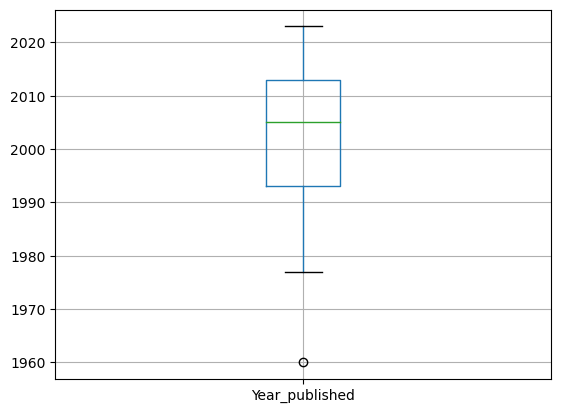

In [162]:
#looking at outliers
gr1.boxplot(column='Year_published')

In [163]:
#focusing in on the last 10 years to exlcude the outliers
last_tengr = gr1[gr1.Year_published>=2013]

### Cleaned Data Analysis

In [165]:
last_tengr.columns

Index(['Unnamed: 0', 'isbn', 'title', 'series_title', 'series_release_number',
       'authors', 'publisher', 'language', 'description', 'num_pages',
       'format', 'genres', 'publication_date', 'rating_score', 'num_ratings',
       'num_reviews', 'current_readers', 'want_to_read', 'price', 'url',
       'Year_published', 'Month_published'],
      dtype='object')

In [166]:
last_tengr = last_tengr[['title', 'series_title', 'series_release_number',
       'authors', 'publisher', 'language', 'description', 'num_pages',
       'format', 'genres', 'publication_date', 'rating_score', 'num_ratings',
       'num_reviews', 'current_readers', 'want_to_read', 'price', 'url',
       'Year_published', 'Month_published']]

In [167]:
last_tengr1 = last_tengr.copy()

In [168]:
last_tengr1['relative_n_reviews'] = round(last_tengr1['num_reviews']/(2024-last_tengr1['Year_published']))

In [169]:
last_tengr1['relative_n_ratings'] = round(last_tengr1['num_ratings']/(2024-last_tengr1['Year_published']))

In [170]:
last_tengr1['rel_want_to_read'] = round(last_tengr1['want_to_read']/(2024-last_tengr1['Year_published']))

In [171]:
last_tengr1

,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,...,num_reviews,current_readers,want_to_read,price,url,Year_published,Month_published,relative_n_reviews,relative_n_ratings,rel_want_to_read
3300,Walking Disaster,Beautiful,2.0,Jamie McGuire,Atria Books,English,How much is too much to love? Travis Maddox le...,448.0,Paperback,"['Romance', 'New Adult', 'Contemporary', 'Cont...",...,12713.0,NaN,96300.0,12.99,https://www.goodreads.com/book/show/15745950-w...,2013.0,4.0,1156.0,17859.0,8755.0
3301,Clockwork Princess,The Infernal Devices,3.0,Cassandra Clare,Walker Books Ltd,English,"Danger and betrayal, love and loss, secrets an...",567.0,Paperback,"['Fantasy', 'Young Adult', 'Romance', 'Paranor...",...,39320.0,NaN,257000.0,10.99,https://www.goodreads.com/book/show/18335634-c...,2013.0,3.0,3575.0,40089.0,23364.0
3302,Real,Real,1.0,Katy Evans,Smashwords,English,A fallen boxer.\nA woman with a broken dream.\...,293.0,Ebook,"['Romance', 'New Adult', 'Sports', 'Contempora...",...,8269.0,NaN,63600.0,0.00,https://www.goodreads.com/book/show/17617277-real,2013.0,4.0,752.0,10199.0,5782.0
3303,Entwined with You,Crossfire,3.0,Sylvia Day,Berkley,English,"From the moment I first met Gideon Cross, I re...",356.0,Paperback,"['Romance', 'Erotica', 'Contemporary Romance',...",...,10688.0,NaN,83600.0,9.99,https://www.goodreads.com/book/show/15731779-e...,2013.0,6.0,972.0,18893.0,7600.0
3304,Reckless,Thoughtless,3.0,S.C. Stephens,Gallery Books,English,Can love survive when life gets Reckless?\nWhe...,546.0,Ebook,"['Romance', 'New Adult', 'Contemporary', 'Cont...",...,5390.0,NaN,36200.0,0.00,https://www.goodreads.com/book/show/13600318-r...,2013.0,3.0,490.0,7060.0,3291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,God of Ruin,Legacy of Gods,4.0,Rina Kent,"Blackthorn Books, LLC",English,"I’m out for revenge.\nAfter careful planning, ...",430.0,Ebook,"['Romance', 'Dark', 'College', 'New Adult', 'C...",...,3700.0,NaN,33600.0,0.00,https://www.goodreads.com/book/show/63346945-g...,2023.0,8.0,3700.0,30224.0,33600.0
4390,A Fire in the Flesh,Flesh and Fire,3.0,Jennifer L. Armentrout,Blue Box Press,English,The only thing that can save the realms now is...,632.0,Ebook,"['Fantasy', 'Romance', 'Fantasy Romance', 'Adu...",...,3727.0,NaN,79900.0,7.99,https://www.goodreads.com/book/show/61150440-a...,2023.0,10.0,3727.0,35384.0,79900.0
4393,The Crown of Oaths and Curses,The Mortal Fates,1.0,J. Bree,NaN,English,I devoted my life to a king who was not my own...,663.0,Ebook,"['Fantasy', 'Fantasy Romance', 'Fae', 'Romance...",...,1297.0,NaN,28500.0,0.00,https://www.goodreads.com/book/show/63119009-t...,2023.0,5.0,1297.0,7249.0,28500.0
4395,System Collapse,The Murderbot Diaries,7.0,Martha Wells,Tor Publishing Group/Tordotcom,English,Everyone's favorite lethal SecUnit is back.\nF...,245.0,Hardcover,"['Science Fiction', 'Fiction', 'Audiobook', 'A...",...,3441.0,NaN,36600.0,11.99,https://www.goodreads.com/book/show/65211701-s...,2023.0,11.0,3441.0,26147.0,36600.0


In [172]:
last_tengr1 = last_tengr1[['title', 'series_title', 'series_release_number', 'authors',
       'publisher', 'language', 'description', 'num_pages', 'format', 'genres',
       'publication_date', 'rating_score',
       'current_readers','price', 'Year_published',
       'Month_published', 'relative_n_reviews', 'relative_n_ratings',
       'rel_want_to_read']]

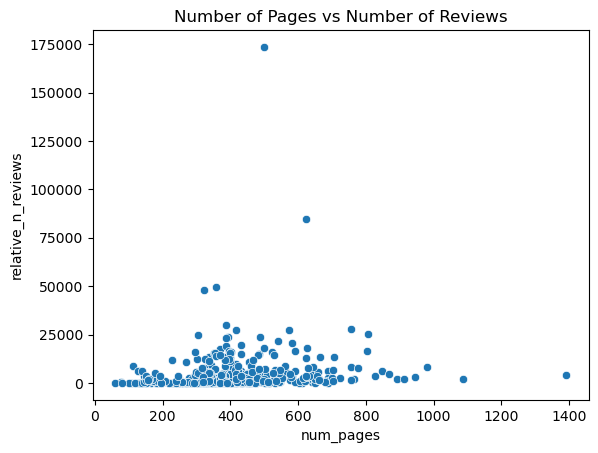

In [173]:
g = sns.scatterplot(data=last_tengr1, x='num_pages', y='relative_n_reviews');
plt.title('Number of Pages vs Number of Reviews');

### Finding Outliers

In [174]:
Qrt75 = last_tengr1.relative_n_reviews.quantile(0.75)
Qrt25 = last_tengr1.relative_n_reviews.quantile(0.25)

In [175]:
last_tengr1 = last_tengr1[last_tengr1['relative_n_reviews']<=Qrt75]

In [176]:
last_tengr1 = last_tengr1[last_tengr1['relative_n_reviews']<=Qrt75]

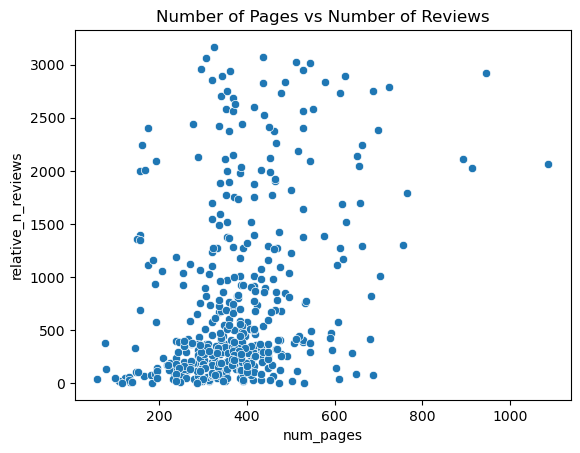

In [177]:
g = sns.scatterplot(data=last_tengr1, x='num_pages', y='relative_n_reviews');
plt.title('Number of Pages vs Number of Reviews');

In [178]:
quantatative = last_tengr1.select_dtypes(include='number')

In [179]:
correlation = quantatative.corr()

In [180]:
sns.set()

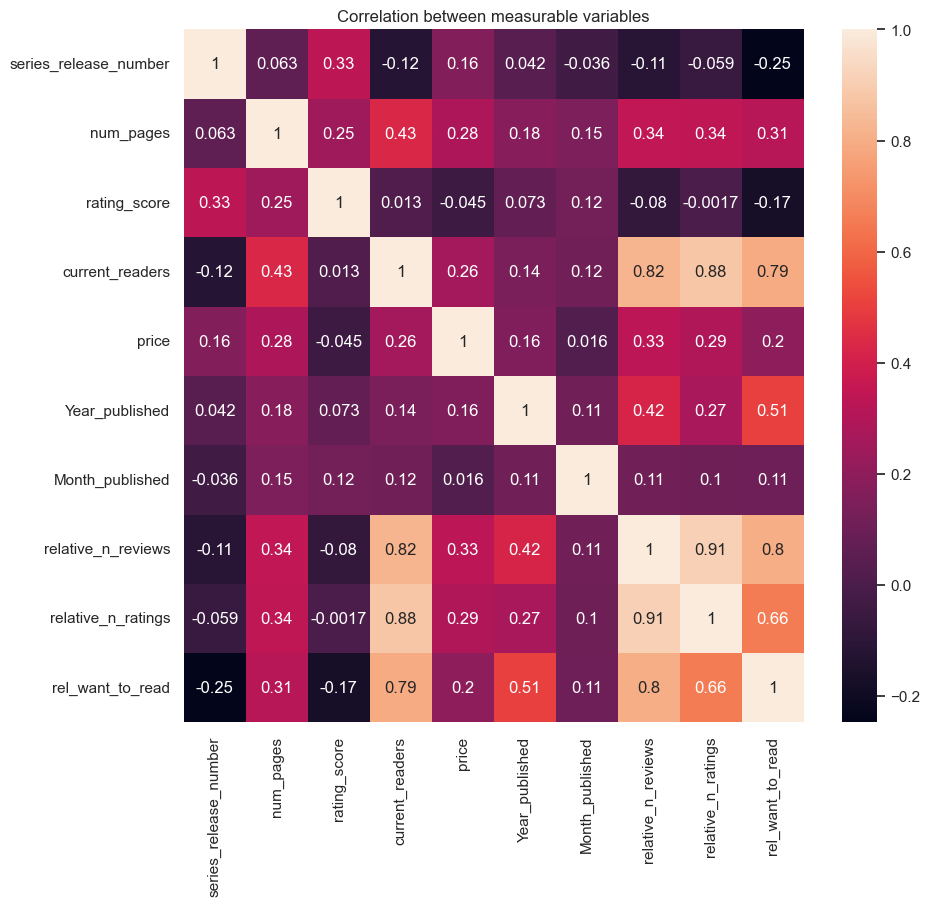

In [181]:

plt.figure(figsize=(10,9))
sns.heatmap(quantatative.corr(), annot=True)
plt.title('Correlation between measurable variables')
plt.show()

Text(0, 0.5, 'N of Reviews')

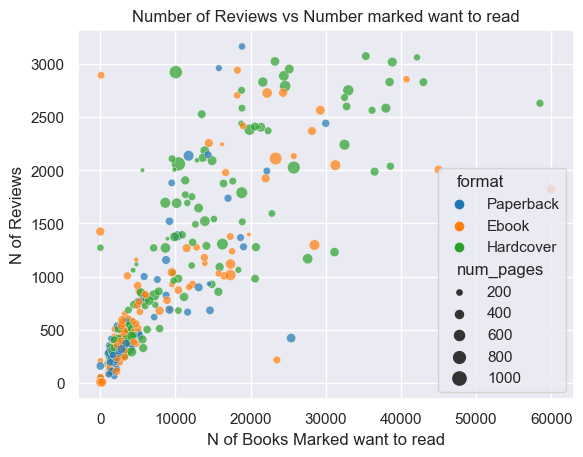

In [182]:
sns.color_palette("tab10")

sns.scatterplot(x='rel_want_to_read', y='relative_n_reviews', data=last_tengr1, hue="format", palette='tab10',  alpha=0.7, size="num_pages", sizes=(1,100));
plt.title('Number of Reviews vs Number marked want to read')
plt.xlabel('N of Books Marked want to read')
plt.ylabel('N of Reviews')

### Month

Text(0, 0.5, 'count of books')

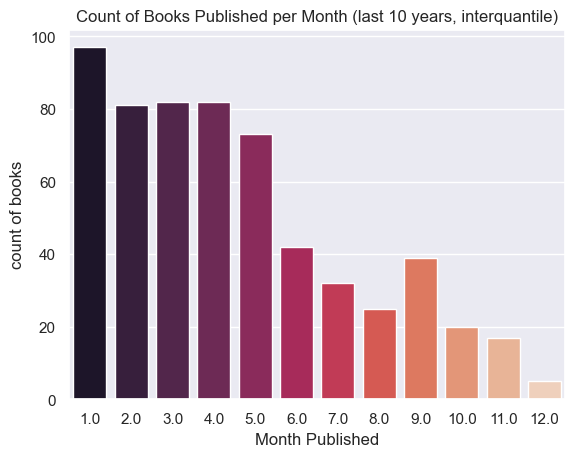

In [183]:
sns.countplot(x='Month_published', data=last_tengr, palette='rocket')
plt.title('Count of Books Published per Month (last 10 years, interquantile)')
plt.xlabel('Month Published')
plt.ylabel('count of books')

C:\Users\charl\AppData\Local\Temp\ipykernel_225112\263590142.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Month_published', y='relative_n_reviews', data=last_tengr1, palette='tab10', color='#732150');


Text(0, 0.5, 'N of Reviews')

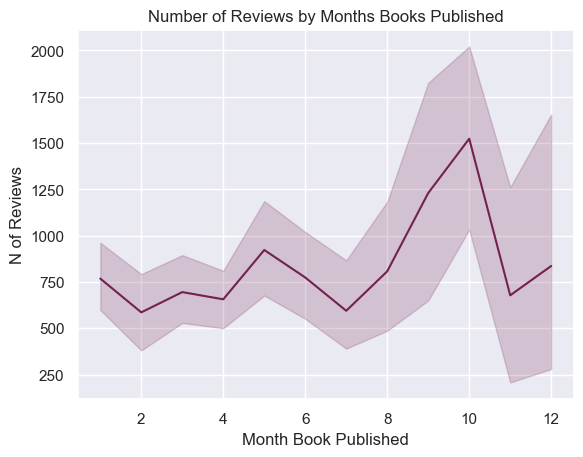

In [184]:
sns.lineplot(x='Month_published', y='relative_n_reviews', data=last_tengr1, palette='tab10', color='#732150');
plt.title('Number of Reviews by Months Books Published')
plt.xlabel('Month Book Published')
plt.ylabel('N of Reviews')

In [185]:
last_tengr1.columns

Index(['title', 'series_title', 'series_release_number', 'authors',
       'publisher', 'language', 'description', 'num_pages', 'format', 'genres',
       'publication_date', 'rating_score', 'current_readers', 'price',
       'Year_published', 'Month_published', 'relative_n_reviews',
       'relative_n_ratings', 'rel_want_to_read'],
      dtype='object')

In [186]:
last_tengr1['n_years_published'] = (2024-last_tengr1['Year_published'])

Text(0, 0.5, 'Years Published')

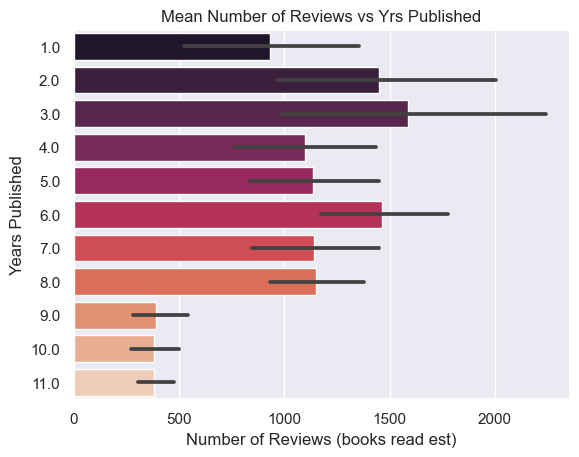

In [187]:
sns.barplot(y='n_years_published', x='relative_n_reviews', data=last_tengr1, palette='rocket', orient='h');
plt.title('Mean Number of Reviews vs Yrs Published')
plt.xlabel('Number of Reviews (books read est)')
plt.ylabel('Years Published')

In [188]:
last_tengr1.columns

Index(['title', 'series_title', 'series_release_number', 'authors',
       'publisher', 'language', 'description', 'num_pages', 'format', 'genres',
       'publication_date', 'rating_score', 'current_readers', 'price',
       'Year_published', 'Month_published', 'relative_n_reviews',
       'relative_n_ratings', 'rel_want_to_read', 'n_years_published'],
      dtype='object')

Text(0, 0.5, 'Number of Reviews per year of release')

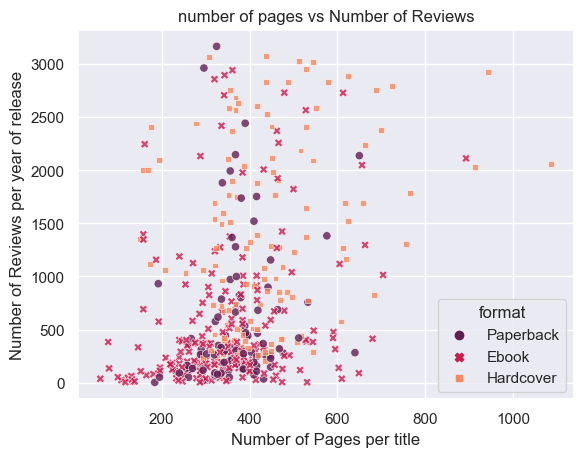

In [189]:
pagesreview = sns.scatterplot(data=last_tengr1, x='num_pages', y='relative_n_reviews', alpha=0.8, palette='rocket', hue='format', style='format')
plt.title('number of pages vs Number of Reviews')
plt.xlabel('Number of Pages per title')
plt.ylabel('Number of Reviews per year of release')

Text(0, 0.5, 'Number of Reviews per year of release')

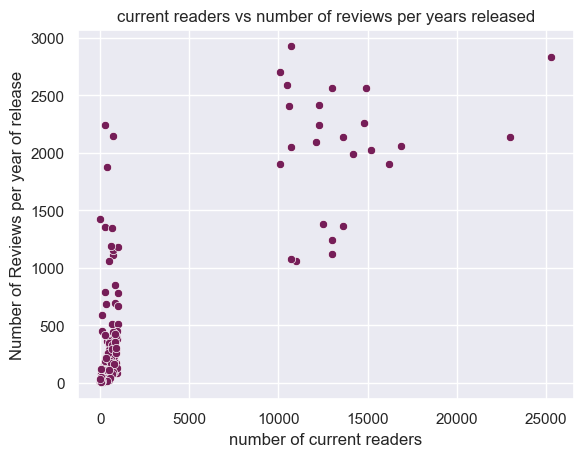

In [190]:
currentreaders = sns.scatterplot(data=last_tengr1, x='current_readers', y='relative_n_reviews', alpha=1, color='#761e58')
plt.title('current readers vs number of reviews per years released')
plt.xlabel('number of current readers')
plt.ylabel('Number of Reviews per year of release')

Text(0, 0.5, 'Number of pages')

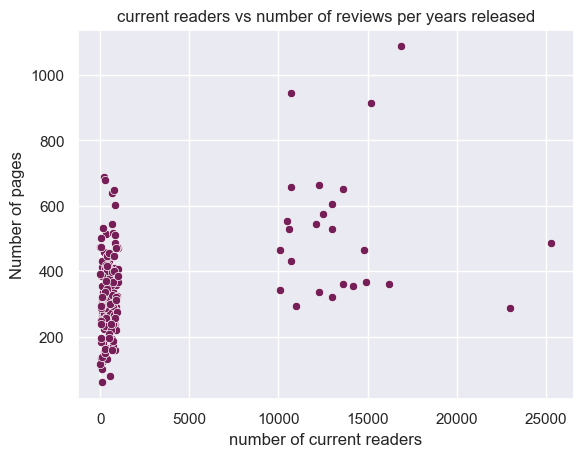

In [191]:
currentreaders = sns.scatterplot(data=last_tengr1, x='current_readers', y='num_pages', alpha=1, color='#761e58')
plt.title('current readers vs number of reviews per years released')
plt.xlabel('number of current readers')
plt.ylabel('Number of pages')

In [192]:
last_tengr1[last_tengr1['Year_published']==2023]

,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,current_readers,price,Year_published,Month_published,relative_n_reviews,relative_n_ratings,rel_want_to_read,n_years_published
4344,Not in a Billion Years,True Love,1.0,Camilla Isley,Boldwood Books,English,She's a self-made fitness sensation. He's a bi...,370.0,Ebook,"['Romance', 'Contemporary', 'Chick Lit', 'Cont...",2023-09-06,3.83,308.0,0.00,2023.0,9.0,215.0,1302.0,23500.0,1.0
4347,Heir of Broken Fate,HOBF,1.0,Mads Rafferty,Independently Published,English,One hundred and fifty years ago the Fae race v...,512.0,Paperback,"['Fantasy', 'Fantasy Romance', 'Romance', 'Fae...",2023-05-03,3.77,816.0,0.00,2023.0,5.0,421.0,3632.0,25400.0,1.0
4355,The General,Heroes of the Empire,2.0,Israh Azizi,PageTurnerPress LLC,English,The adventure continues in this heart-pounding...,391.0,NaN,"['Young Adult', 'Fantasy']",2023-11-23,4.62,6.0,4.99,2023.0,11.0,31.0,39.0,128.0,1.0
4356,Lost in the Moment and Found,Wayward Children,8.0,Seanan McGuire,Tordotcom,English,A young girl discovers an infinite variety of ...,161.0,Ebook,"['Fantasy', 'Young Adult', 'Novella', 'Fiction...",2023-01-10,4.33,244.0,12.99,2023.0,1.0,2246.0,11790.0,16200.0,1.0
4359,Magic Claims,"Kate Daniels: Wilmington Years, Kate Daniels",2.0,Ilona Andrews,NYLA,English,Kate and Curran have just settled into their n...,240.0,Ebook,"['Urban Fantasy', 'Fantasy', 'Paranormal', 'Ma...",2023-06-13,4.72,623.0,5.99,2023.0,6.0,1189.0,10835.0,NaN,1.0
4361,Magic Tides,"Kate Daniels: Wilmington Years, Kate Daniels",1.0,Ilona Andrews,NYLA,English,Ilona Andrews invites you back to the #1 New Y...,158.0,Ebook,"['Urban Fantasy', 'Fantasy', 'Paranormal', 'Ma...",2023-01-17,4.53,673.0,4.99,2023.0,1.0,1348.0,13738.0,NaN,1.0
4378,Lore Olympus: Volume Four,Lore Olympus,4.0,Rachel Smythe,Random House Worlds,English,Witness what the gods do after dark in the fou...,416.0,Hardcover,"['Graphic Novels', 'Fantasy', 'Romance', 'Myth...",2023-06-06,4.51,364.0,NaN,2023.0,6.0,1877.0,25657.0,16400.0,1.0
4379,That Time I Got Drunk and Saved a Human,Mead Mishaps,3.0,Kimberly Lemming,Jo Fletcher Books,English,"When I was a little girl, my Ma used to read m...",336.0,Paperback,"['Fantasy', 'Romance', 'Fantasy Romance', 'Dra...",2023-05-23,4.22,285.0,9.99,2023.0,5.0,787.0,4799.0,NaN,1.0
4382,The Bitter Past,Porter Beck,1.0,Bruce Borgos,Minotaur Books,English,In the tradition of Craig Johnson and C. J. Bo...,320.0,Hardcover,"['Mystery', 'Thriller', 'Fiction', 'Mystery Th...",2023-07-18,4.09,109.0,14.99,2023.0,7.0,454.0,1310.0,NaN,1.0
4384,Bone Island: Book of Danvers,Tales of Weeping Hollow,2.0,Nicole Fiorina,Nicole Fiorina Books,English,𝐒𝐡𝐞 𝐜𝐫𝐚𝐯𝐞𝐝 𝐚𝐧 𝐞𝐬𝐜𝐚𝐩𝐞. 𝐇𝐞 𝐜𝐫𝐚𝐯𝐞𝐝 𝐭𝐨 𝐛𝐞 𝐟𝐨𝐮𝐧𝐝.\n...,680.0,Ebook,"['Fantasy', 'Romance', 'Paranormal', 'Gothic',...",2023-03-17,4.45,285.0,6.99,2023.0,3.0,414.0,1293.0,NaN,1.0


C:\Users\charl\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Month_published', ylabel='current_readers'>

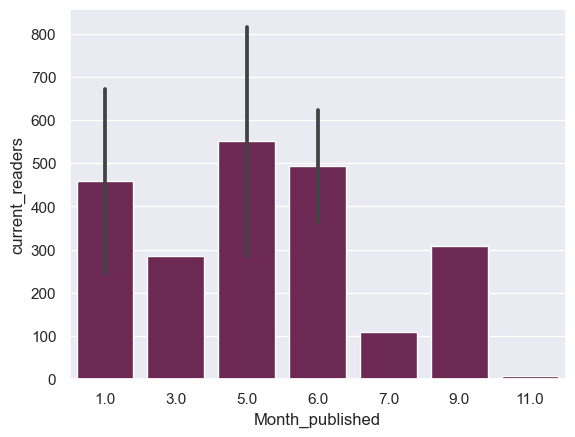

In [193]:
sns.barplot(data=last_tengr1[last_tengr1['Year_published']==2023], x='Month_published', y='current_readers', alpha=1, color='#761e58')

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='Month_published', ylabel='current_readers'>

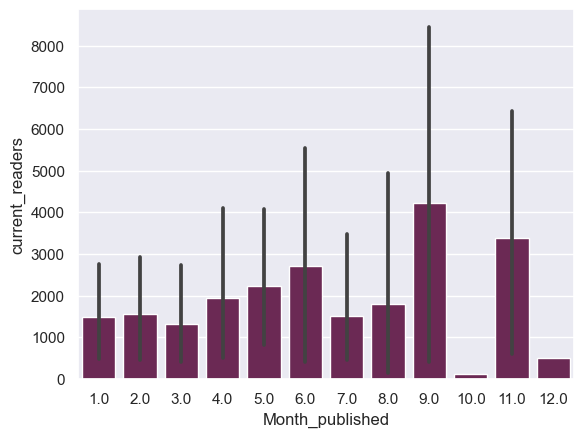

In [194]:
sns.barplot(data=last_tengr1, x='Month_published', y='current_readers', alpha=1, color='#761e58')

<Axes: xlabel='Month_published', ylabel='current_readers'>

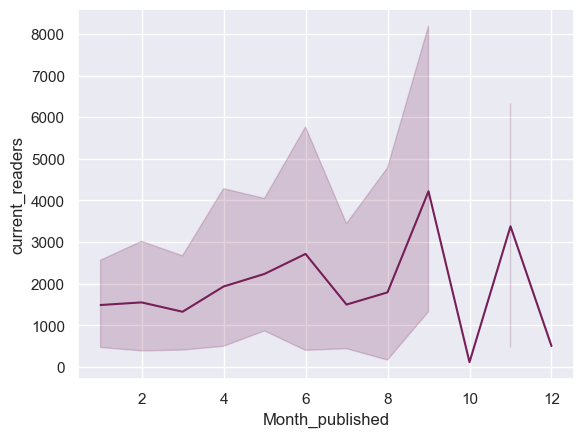

In [195]:
sns.lineplot(data=last_tengr1, x='Month_published', y='current_readers', alpha=1, color='#761e58')

In [199]:
genredf.genres = genredf.genres.str.strip()

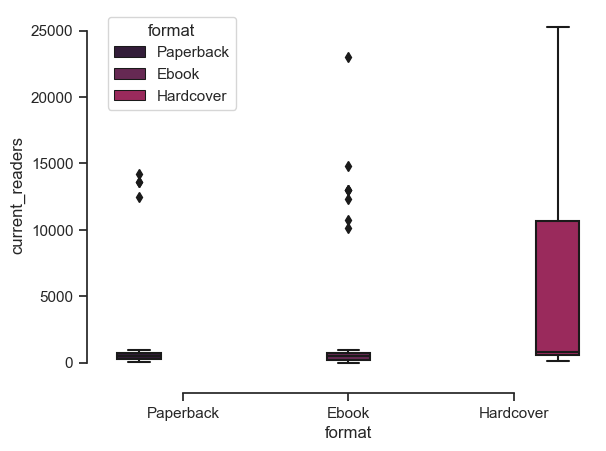

In [200]:
import seaborn as sns
sns.set_theme(style="ticks", palette="rocket")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="format", y="current_readers",
            hue="format",
            data=last_tengr1)
sns.despine(offset=10, trim=True)

Text(0.5, 1.0, 'Book Lengths by format')

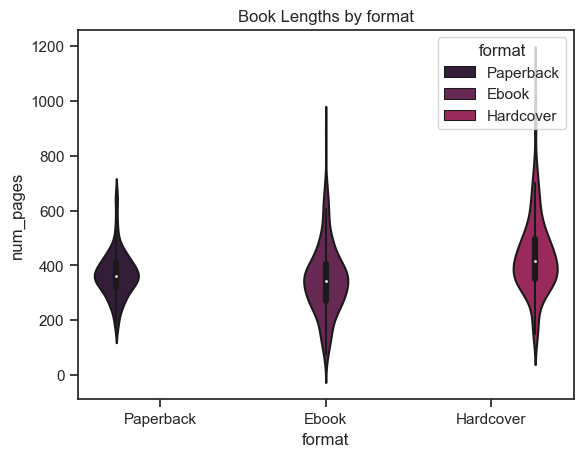

In [201]:
sns.violinplot(last_tengr1, x='format', y='num_pages', size='num_pages', hue='format')
plt.title('Book Lengths by format')

In [202]:
last_tengr1.columns

Index(['title', 'series_title', 'series_release_number', 'authors',
       'publisher', 'language', 'description', 'num_pages', 'format', 'genres',
       'publication_date', 'rating_score', 'current_readers', 'price',
       'Year_published', 'Month_published', 'relative_n_reviews',
       'relative_n_ratings', 'rel_want_to_read', 'n_years_published'],
      dtype='object')

Text(0.5, 1.0, 'Rating vs current_readers')

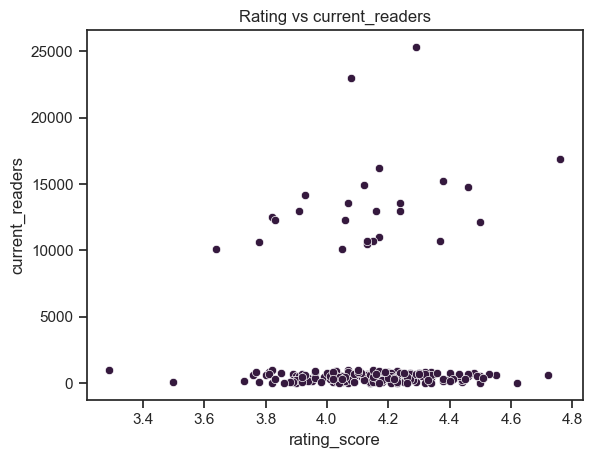

In [203]:
sns.scatterplot(last_tengr1, x='rating_score', y="current_readers")
plt.title('Rating vs current_readers')

Text(0.5, 1.0, 'Rating vs number of reviews')

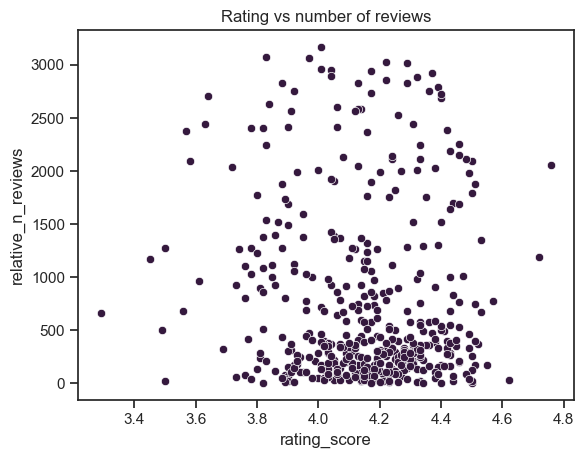

In [204]:
sns.scatterplot(last_tengr1, x='rating_score', y="relative_n_reviews")
plt.title('Rating vs number of reviews')

Text(0.5, 1.0, 'Rating vs number of reviews')

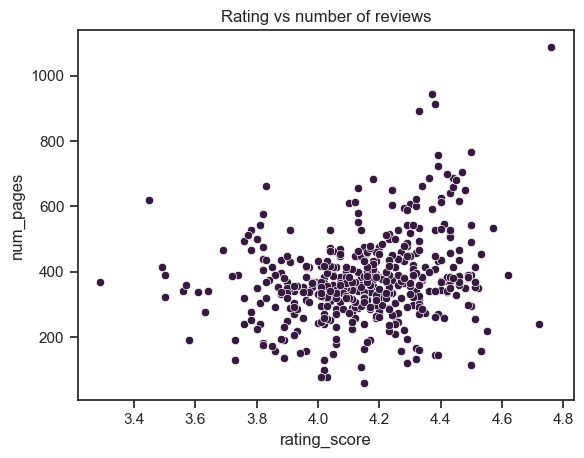

In [205]:
sns.scatterplot(last_tengr1, x='rating_score', y="num_pages")
plt.title('Rating vs number of reviews')

<Axes: ylabel='relative_n_ratings'>

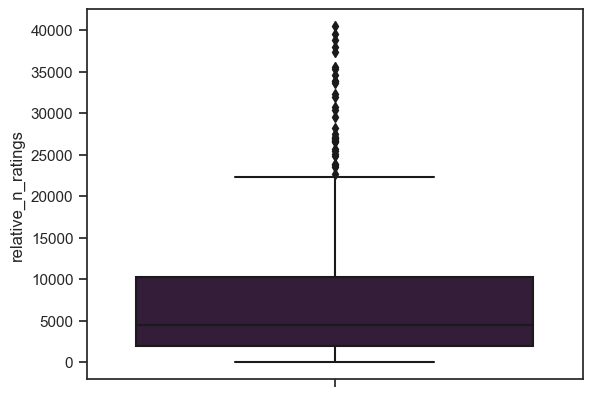

In [209]:
sns.boxplot(y="relative_n_ratings", hue='format', data=last_tengr1)

In [210]:
last_tengr[['num_ratings', 'want_to_read', 'current_readers']].describe()

,num_ratings,want_to_read,current_readers
count,5.950000e+02,486.000000,300.000000
mean,1.334256e+05,128992.421811,10297.930000
std,2.569883e+05,168553.769105,20324.784061
min,3.900000e+01,39.000000,2.000000
25%,2.094900e+04,22000.000000,364.000000
50%,5.114900e+04,69400.000000,674.000000
75%,1.283655e+05,170750.000000,13150.000000
max,3.201607e+06,1000000.000000,132000.000000


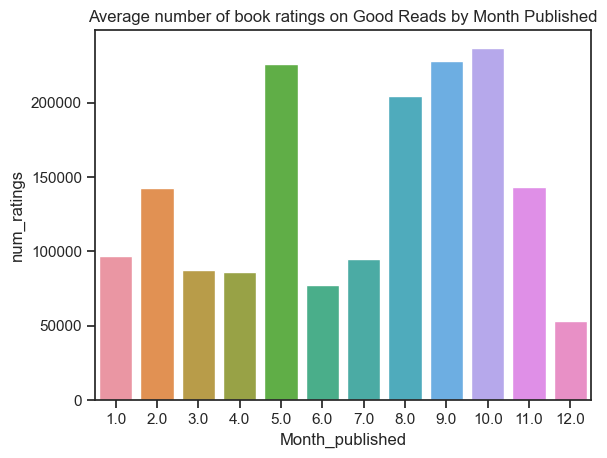

In [218]:
#barplot shows by mean
sns.barplot(x="Month_published", y="num_ratings", data=last_tengr, errorbar=None);
plt.title('Average number of book ratings on Good Reads by Month Published');

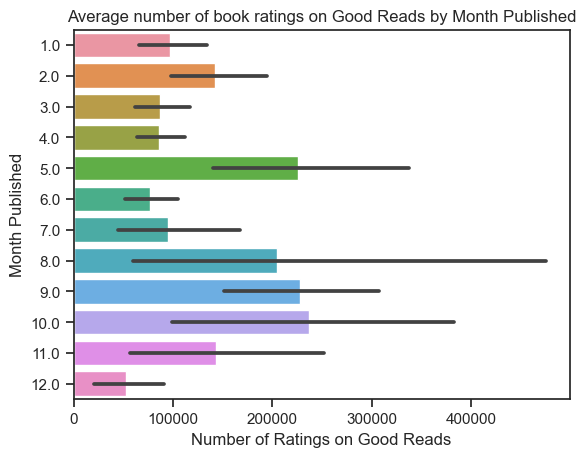

In [219]:
sns.barplot(y="Month_published",x="num_ratings", data=last_tengr,orient='h');
plt.title('Average number of book ratings on Good Reads by Month Published');
plt.ylabel('Month Published');
plt.xlabel('Number of Ratings on Good Reads');

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


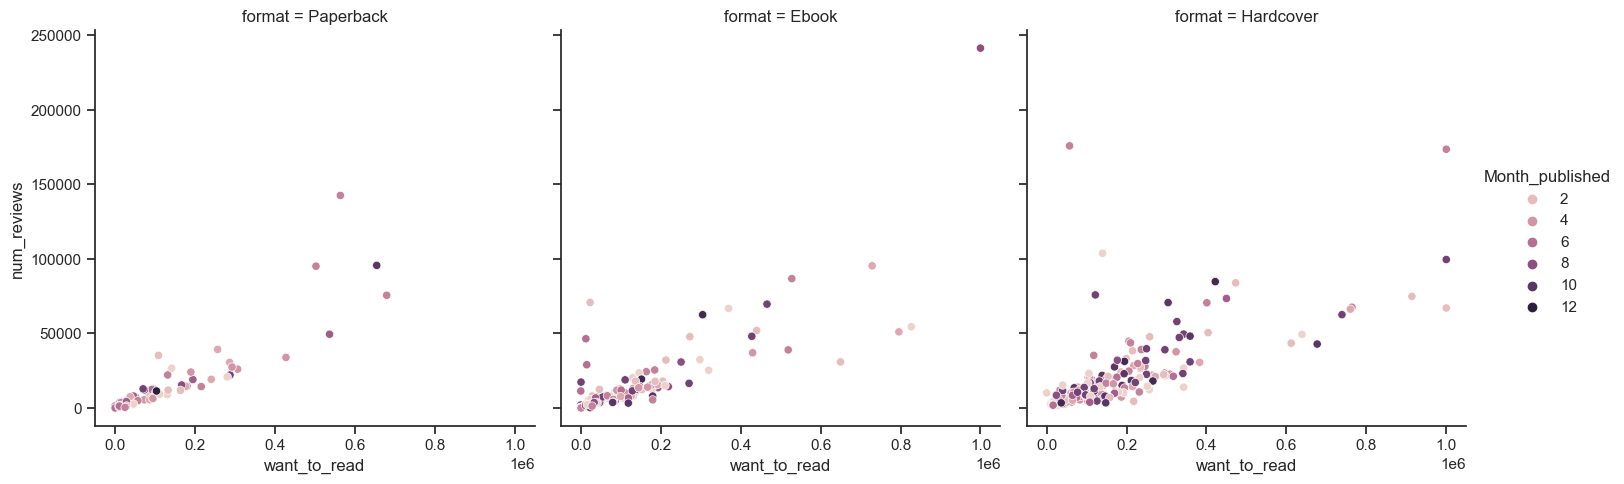

In [226]:
sns.relplot(x='want_to_read', y='num_reviews', data=last_tengr, col='format', hue='Month_published')

In [227]:
last_tengr.groupby('Month_published')['num_reviews'].sum().sort_values()

Month_published
12.0      30744.0
11.0     261026.0
7.0      267356.0
6.0      330331.0
10.0     433655.0
8.0      441620.0
4.0      694372.0
3.0      784356.0
1.0      932898.0
9.0      934048.0
2.0     1115178.0
5.0     1517960.0
Name: num_reviews, dtype: float64

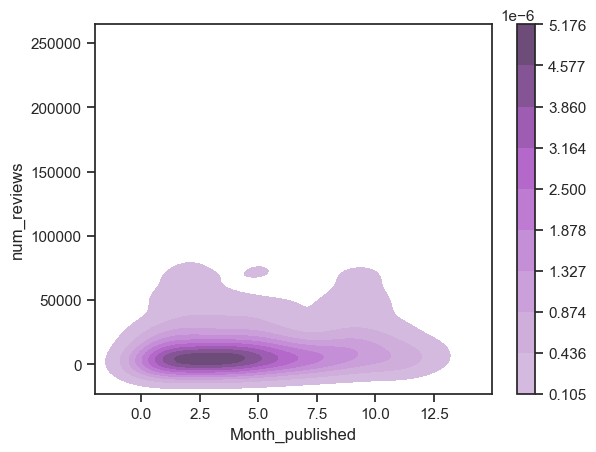

In [228]:
sns.kdeplot(x=last_tengr.Month_published, y=last_tengr.num_reviews, fill=True, cbar=True);